# Compute Architecure - Assessment
**Course**: TU 2025 25-26: 8645 -- COMPUTER INFRASTRUCTURE  
**Lecturer**: Ian McLauglin  
**Author**: Clyde Watts  

__Summary__

The object of the Compute Architecture - Assessment , is to create a notebook ( problems.ipynb ) and an associated python script , which will export the FAANG share prices using yfinance for the last 5 business days and then load the files , and produce a report of the closing prices. 



![DataFlow](./faang_dataflow.png)




### Imports

yfinance - financial ticker data from yahoo  - [yfinance](https://github.com/ranaroussi/yfinance)
datetime - pythons inbuild date time
logging - python logging
os - operating system functions
glob - file selector

In [1]:

import logging
from datetime import datetime, timedelta
import os
import pathlib as Path
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import seaborn as sns
import numpy as np
import yfinance as yf

##  Initialisation

In [2]:
# init logging
logging.basicConfig(level=logging.INFO)

In [3]:
# Delete all CSV files in the data directory
data_path = "./data/"
files = glob.glob(os.path.join(data_path, "*.csv"))
for f in files:
    print(f"Deleting file: {f}")
    os.remove(f)

Deleting file: ./data\20251118_193459.csv
Deleting file: ./data\20251118_195424.csv


### Helper Functions 




__Function: print_status__

Prints the status with a green tick or red cross. This makes it easier to validate function return codes

In [4]:





def print_status(return_code, description, return_message):
    """
    Print status with visual indicator
    
    Args:
        return_code (int): 0 for success, non-zero for failure
        description (str): Status description
        return_message (str): Related file name
    """
    if return_code == 0:
        # Green tick for success (bold)
        status_symbol = "\033[1;92m✓\033[0m"  # Bold green checkmark
    else:
        # Red X for failure (bold)
        status_symbol = "\033[1;91m✗\033[0m"  # Bold red X

    # Print entire line in bold
    print(f"\033[1m{status_symbol} Status: {return_code}, Message: {description}, File: {return_message}\033[0m")


__Smoke Test__

Check if print status will work

In [5]:
print("Smoke Test Results:")
print_status(0, "Latest file retrieval", "file_name.csv")
print_status(1, "File retrieval failed", "file_name.csv")

Smoke Test Results:
✓ Status: 0, Message: Latest file retrieval, File: file_name.csv
✗ Status: 1, Message: File retrieval failed, File: file_name.csv


__Function: data_retention

This will cleanup data , plot and log directories old files ( older than 21 days )

In [6]:
def data_retention(old_days=21):
    """
    This will cleanup data , plot and log directories old files ( older than old_days )
    
    Args:
        old_days (int): Number of days to retain files. Files older than this will be deleted.
    """
    return_code = 0
    return_message = "Data retention completed successfully."
    # Define directories to clean
    directories = ["./data/", "./plots/", "./logs/"]
    # Get current date
    now = datetime.now()
    # Calculate cutoff date
    cutoff_date = now - timedelta(days=old_days)

    for directory in directories:
        # Ensure directory exists
        Path.Path(directory).mkdir(parents=True, exist_ok=True)
        # Iterate over files in directory
        for file_path in Path.Path(directory).glob("*"):
            # Get file's last modified time
            file_mod_time = datetime.fromtimestamp(file_path.stat().st_mtime)
            # If file is older than cutoff date, delete it
            if file_mod_time < cutoff_date:
                print(f"Deleting old file: {file_path} (Last modified: {file_mod_time})")
                file_path.unlink()  # Delete the file
    return return_code,  return_message

__Smoke Test__

Check if there are any plot , data and log files older 21 days and delete

In [7]:
return_code, return_message = data_retention(old_days=21)
print_status(return_code, "Data Retention Cleanup", return_message)

✓ Status: 0, Message: Data Retention Cleanup, File: Data retention completed successfully.


## Problem 1: Data from yfinance

Using the [yfinance](https://github.com/ranaroussi/yfinance) Python package, write a function called `get_data()` that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

The function should save the data into a folder called `data` in the root of your repository using a filename with the format `YYYYMMDD-HHmmss.csv` where `YYYYMMDD` is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. `09` for September), followed by the two digit day, and `HHmmss` is hour, minutes, seconds.
Create the `data` folder if you don't already have one.

## Problem 1: Requirements ##

### Extract ###

1.  Extract from yfinance data the stock data for META,AAPL,AMZN,NFLX,GOOG
2.  For 5 complete previous days trading , we need to take into account that NASDAQ trades from Monday to Friday. If we go back 7 days we will always ignore weekends
3.  File format will YYYYMMDD-HHmmss.csv where YYYY - is 4 digit year , MM month 01-12 , DD - is 01-31. HH - hours , 24 our clock , mm - minutes 00-59 , seconds 00-59.
4.  Grain - Hour

__Column__

- Date , <ticket> ( Open,High,Low,Close,Volume) ....
ticket is META , AAPL , AMZN , NFLX or GOOG
- Open - open price
- Close - close price
- High - High pricr
- Low - Low price
- Volumn - Volume in period

The data frame return has an index on the date , and is a multilevel index. Level one is the ticket , and the second level is the metric - that is open , close , high , low prices and volume 

Note: AI was used to generate the checklist , the author likes the style. The checklist was not used as a prompt to generate the code.

### Assignment: Problem 1 Requirements Specification

**1. Data Specification**
* [✅] Define the list of target tickers: META, AAPL, AMZN, NFLX, and GOOG.
* [✅] Define the data interval as "hourly".
* [✅] Define the data period as the "previous five days".

**2. Data Fetching**
* [✅] Use the `yfinance` Python package.
* [✅] Write code to download the data for all five tickers based on the interval and period.
* [✅] Store the downloaded data, likely in a `pandas` DataFrame.

**3. Folder Management**
* [✅] Check if a folder named `data` exists in the root of the repository.
* [✅] If the `data` folder does not exist, create it.

**4. File Output**
* [✅] Get the current date and time.
* [✅] Format the current date and time into a string `YYYYMMDD-HHmmss`.
* [✅] Create the full output path by combining the `data` folder, the formatted datetime string, and the `.csv` extension.
* [✅] Save the downloaded data DataFrame to this CSV file.



__Global Parameters__



In [8]:
# List of tickers to download
# TODO : Add a yaml config file for global parameters
tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]

__Function : get_data__

This downloads the latest data for a number of listed stock companies using yfinance module and writes to CSV file. 

In [9]:

def get_data(tickers = tickers,start_date=None, end_date=None,interval="1h",data_path="./data/",once_only=True):
    """
    Function to get stock data from yfinance

    Parameters:
    tickers (list): List of stock tickers to download data for
    start_date (str): Start date for data in format "YYYY-MM-DD". If None, defaults to 6 days ago.
    end_date (str): End date for data in format "YYYY-MM-DD". If None, defaults to yesterday.
    interval (str): Data interval. Default is "1h".
    data_path (str): Path to save the data. Default is "./data/".
    once_only (bool): If True, download data only once for a date and do not overwrite existing files. Default is True.
    If set to false it will delete existing files and download again.
    TODO: add only once functionality
    Returns:
       return_code : 0 for success, -1 for failure
       return_message : message indicating success or failure
       file_name (str): Name of the file where data is saved
    """
    return_code = 0
    return_message = "Success"
    file_name = None
    # TODO : implement once_only functionality
    # TODO : Sort out logic of start_date and end_date for once only check , simplify
    # Get current date and time and keep it constant
    now_dttm = datetime.now()
    # if start_date is None , set to today - 7 days
    start_date_dttm =(now_dttm - timedelta(days=7)) if start_date is None else datetime.strptime(start_date, "%Y-%m-%d")
    start_date = start_date_dttm.strftime("%Y-%m-%d") if start_date is None else start_date
    start_date_dttm = datetime.strptime(start_date, "%Y-%m-%d")
    # create file name from start date
    file_name = f"{data_path}{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
    # create string for glob to check if file exists for start date
    start_date_glob_str = f"{data_path}{datetime.now().strftime('%Y%m%d')}*.csv"
    if once_only and glob.glob(start_date_glob_str):
        logging.info(f"File already exists for start date {start_date}, skipping download.")
        existing_files = glob.glob(start_date_glob_str)
        file_name = existing_files[0]  # Get the first matching file
        return return_code, return_message, file_name

        
    # if end_date is None , set to today - 0 days this means yesterday's data inclusive
    if end_date is None:
        end_date = (datetime.now() - timedelta(days=0)).strftime("%Y-%m-%d")
    else: # convert end_date to datetime object
        end_date_time = datetime.strptime(end_date, "%Y-%m-%d")
        # add 1 day to end_date to make it inclusive
        end_date = (end_date_time + timedelta(days=1)).strftime("%Y-%m-%d")
    # check if directory exists
    if not os.path.exists(data_path):
        logging.info(f"Creating directory: {data_path}")
        try:
            os.makedirs(data_path)
        except Exception as e:
            logging.error(f"Error creating directory: {e}")
            return_code = -1
            return_message = f"Error creating directory: {e}"
            return return_code, return_message, None
    # get start date only string for file name for once only check

    # if file exists then delete it
    if os.path.exists(file_name):
        logging.info(f"Deleting existing file: {file_name}")
        try:
            os.remove(file_name)
        except Exception as e:
            logging.error(f"Error deleting file: {e}")
            return_code = -1
            return_message = f"Error deleting file: {e}"
            return return_code, return_message, None
    logging.info(f"Start Date: {start_date}, End Date: {end_date}")
    try:
        df_data = yf.download(tickers, interval=interval, group_by='ticker',start=start_date, end=end_date)
    except Exception as e:
        logging.error(f"Error downloading data: {e}")
        return_code = -1
        return_message = f"Error downloading data: {e}"
        return return_code, return_message, None
    # Save the data to a CSV file
    df_data.to_csv(file_name)
    return return_code, return_message, file_name
   



In [10]:
print("Starting data download...")
return_code, return_message, file_name = get_data(tickers=tickers)
print_status(return_code, return_message, file_name)
df_data = get_data(tickers=tickers) 

INFO:root:Start Date: 2025-11-11, End Date: 2025-11-18


Starting data download...


C:\Users\cw171001\AppData\Local\Temp\ipykernel_23544\1413080824.py:72: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_data = yf.download(tickers, interval=interval, group_by='ticker',start=start_date, end=end_date)
[*********************100%***********************]  5 of 5 completed
INFO:root:File already exists for start date 2025-11-11, skipping download.


✓ Status: 0, Message: Success, File: ./data/20251118_195545.csv


## Problem 2: Plotting Data

Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks.
The plot should include axis labels, a legend, and the date as a title.
The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`.
Create the `plots` folder if you don't already have one.


### Assignment: Problem 2 Requirements Specification

Here is a checklist of all the tasks the `plot_data()` function must accomplish:

**1. File Input & Data Loading**
* [✅] Access the `data` folder.
* [✅] Identify the *latest* file in the `data` folder (e.g., by checking file modification time or finding the most recent date in the filename).
* [✅] Open and read the data from this file (assuming it's a format like CSV, likely using `pandas`).

**2. Data Processing**
* [✅] Extract the `Close` price columns for all five stocks.
* [✅] Ensure the corresponding date/time data is available to be used for the x-axis.

**3. Plot Generation & Styling**
* [✅] Create a *single* plot figure.
* [✅] Plot all five `Close` price series as lines on this single plot.
* [✅] Set a clear label for the x-axis (e.g., "Date").
* [✅] Set a clear label for the y-axis (e.g., "Closing Price ($)").
* [✅] Add a legend that correctly identifies each of the five stocks.
* [✅] Get the *current* date and time.
* [✅] Set the plot's title to the current date (e.g., "Stock Prices as of YYYY-MM-DD").

**4. File Output**
* [✅] Check if a folder named `plots` exists in the root directory.
* [✅] If the `plots` folder does not exist, create it.
* [✅] Generate a filename based on the current date and time in `YYYYMMDD-HHmmss` format (e.g., `20251109-161120`).
* [✅] Save the generated plot to the `plots` folder using the generated filename with a `.png` extension.
* [✅] Ensure the plot is closed after saving to free up resources.



[glob](https://docs.python.org/3/library/glob.html)



__Function: print_status__

This prints the status. 

Clear Down Data before test

__Function : get_the_latest_file__

This scans directory ./data ( parameter ) using a pattern 20....csv to get the latest file and returns the file name

In [11]:
#------------------------------------------------------------------------------
# Function to get the latest file from a directory
#------------------------------------------------------------------------------

def get_latest_file(data_path="./data/"):
    """
    Returns the path to the latest data file in the specified directory.

    Args:
        data_path (str): The path to the directory containing the data files.

        tuple: (return_code, return_message, latest_file) where latest_file is the path to the latest data file, or None if no files are found.
        str: The path to the latest data file, or None if no files are found.
    """
    return_code = 0
    return_message = "Success"
    latest_file = None

    logging.info(f"Getting the latest file from {data_path}")
    # File pattern
    file_pattern = "20[0-9][0-9][0-1][0-9][0-3][0-9]_[0-9][0-9][0-9][0-9][0-9][0-9].csv"
    # Add path to file pattern
    file_pattern = os.path.join(data_path, file_pattern)
    # glob searches directories for files based on a pattern
    try:
        list_of_files = glob.glob(file_pattern)
    except Exception as e:
        logging.error(f"Error occurred while searching for files: {e}")
        return_code=-1
        return_message=f"Error occurred while searching for files: {e}"
        return return_code, return_message, None
    if not list_of_files:
        logging.warning(f"No files found in {data_path} matching pattern {file_pattern}")
        return_code = -1
        return_message = f"No files found in {data_path} matching pattern {file_pattern}"
        return return_code, return_message, None
    # find the latest file based on creation time
    #    max parameters - list and function which gets "value" associated with each item in the list
    #    this gets the "youngest" file based on creation time 
    #    not necessarily the latest date in the file name - design decision 
    #    the premise is that the latest file created is the one we want to use
    latest_file = max(list_of_files, key=os.path.getctime)
    logging.info(f"Latest file: {latest_file}")
    return return_code, return_message, latest_file

__Function: get_PNG_filename_from_CSV_filename__

This function will return the png file name based on csv file name

In [12]:
def get_PNG_filename_from_CSV_filename(csv_filename,plot_path="./plots/"):
    """
    Function to get PNG filename from CSV filename

    Parameters:
    csv_filename (str): Name of the CSV file
    plot_path (str): Path to save the PNG file. Default is "./plots/".

    Returns:
       png_filename (str): Name of the PNG file
    """
    return_code = 0
    return_message = "Success"
    # extract base name from csv_filename
    base_name = os.path.basename(csv_filename)
    # remove .csv extension
    base_name = os.path.splitext(base_name)[0]
    # create png filename
    png_filename = f"{plot_path}{base_name}.png"
    return return_code, return_message, png_filename

__Smoke Test__

Run both functions , get_lastest_file and convert name from CSV to PNG

In [13]:
return_code, return_message, file_name = get_latest_file()
print_status(return_code, f"Latest file retrieval - Return Code: {return_code}, Message: {return_message}, File: {file_name}", return_message)
# now get png file name from csv file name
return_code, return_message, png_file_path = get_PNG_filename_from_CSV_filename(file_name, "./plots/")
print_status(return_code, f"PNG file path retrieval - Return Code: {return_code}, Message: {return_message}, File: {png_file_path}", return_message)


INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251118_195545.csv


✓ Status: 0, Message: Latest file retrieval - Return Code: 0, Message: Success, File: ./data\20251118_195545.csv, File: Success
✓ Status: 0, Message: PNG file path retrieval - Return Code: 0, Message: Success, File: ./plots/20251118_195545.png, File: Success


__Function : load_file_into_dataframe__

This loads the file name into data frame

In [14]:
def load_file_into_dataframe(file):
    """load_file_into_dataframe

    Args:
        file (str): The path to the data file.

    Returns:
        tuple: (return_code, return_message, df) where:
            return_code (int): 0 for success, -1 for failure
            return_message (str): Success or error message
            df (pd.DataFrame): The data as a pandas DataFrame with multi-level columns
    """
    return_code = 0
    return_message = "Success"
    df = None
    
    # Check if file name is provided
    if file is None:
        logging.error("No file provided to load into dataframe.")
        return_code = -1
        return_message = "No file provided to load into dataframe."
        return return_code, return_message, None
    
    # Check if file exists
    if not os.path.exists(file):
        logging.error(f"File does not exist: {file}")
        return_code = -1
        return_message = f"File does not exist: {file}"
        return return_code, return_message, None
    
    # Load the CSV file into a DataFrame with multi-level columns
    try:
        df = pd.read_csv(file, header=[0,1], index_col=0, parse_dates=True)
        logging.info(f"Successfully loaded data from {file}. Shape: {df.shape}")
    except Exception as e:
        logging.error(f"Error loading file {file}: {e}")
        return_code = -1
        return_message = f"Error loading file {file}: {e}"
        return return_code, return_message, None
    
    return return_code, return_message, df



__Smoke Test__

Check the following

1. Get the latest file
2. Load latest file into data frame
3. Convert CSV file name into PNG file name
4. Print Shape

In [15]:
print("Loading data from the latest file...")
return_code, return_message, latest_file = get_latest_file()
full_file_name = os.path.abspath(latest_file)
print(f"Loading data from file: {full_file_name}")
print_status(return_code, f"Latest file retrieval - Return Code: {return_code}, Message: {return_message}, File: {latest_file}", return_message)    
print("Loading file into dataframe...")
return_code, return_message, df = load_file_into_dataframe(latest_file)
print_status(return_code, f"File load - Return Code: {return_code}, Message: {return_message}, File: {latest_file}", return_message)    

print(f"Dataframe shape: {df.shape}")
# convert csv file name to png file name
return_code, return_message, png_file_path = get_PNG_filename_from_CSV_filename(latest_file, "./plots/")
print(f"PNG file path: {png_file_path}")



INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251118_195545.csv
INFO:root:Successfully loaded data from ./data\20251118_195545.csv. Shape: (35, 25)


Loading data from the latest file...
Loading data from file: c:\Users\cw171001\OneDrive - Teradata\Documents\GitHub\PFDA_computer_architecture\data\20251118_195545.csv
✓ Status: 0, Message: Latest file retrieval - Return Code: 0, Message: Success, File: ./data\20251118_195545.csv, File: Success
Loading file into dataframe...
✓ Status: 0, Message: File load - Return Code: 0, Message: Success, File: ./data\20251118_195545.csv, File: Success
Dataframe shape: (35, 25)
PNG file path: ./plots/20251118_195545.png


### Investigate Data Frame

Have a look at the dataframe and see it's structure. 

https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download

The index is DatetimeIndex - that is the timestamp of the price.
The data appears Company/Ticker - and then metrics - open,high,low,close,volume



In [16]:
# Have a look at the index and columns
print(" Data Frame Info")
print(df.info(verbose=True))

 Data Frame Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2025-11-11 14:30:00+00:00 to 2025-11-17 20:30:00+00:00
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (AAPL, Open)    35 non-null     float64
 1   (AAPL, High)    35 non-null     float64
 2   (AAPL, Low)     35 non-null     float64
 3   (AAPL, Close)   35 non-null     float64
 4   (AAPL, Volume)  35 non-null     int64  
 5   (NFLX, Open)    35 non-null     float64
 6   (NFLX, High)    35 non-null     float64
 7   (NFLX, Low)     35 non-null     float64
 8   (NFLX, Close)   35 non-null     float64
 9   (NFLX, Volume)  35 non-null     int64  
 10  (GOOG, Open)    35 non-null     float64
 11  (GOOG, High)    35 non-null     float64
 12  (GOOG, Low)     35 non-null     float64
 13  (GOOG, Close)   35 non-null     float64
 14  (GOOG, Volume)  35 non-null     int64  
 15  (META, Open)    35 non-null     float64
 16  (META, High)   

Check the first and last dates . To check if the week is being covered.
That is the fense post problem

In [17]:
# Only get the datetime index and convert to a list
datetime_index = df.index.to_series().reset_index(drop=True)
# Convert series datetime to dates and remove duplicates and sort
date_list = datetime_index.dt.date.drop_duplicates().sort_values().astype(str)
print(date_list)

0     2025-11-11
7     2025-11-12
14    2025-11-13
21    2025-11-14
28    2025-11-17
Name: Datetime, dtype: object


Investigate the time zones , the data is from US NASDAQ - Monday to Friday 9:30 to 21:30 EST , UTC+8

https://www.ig.com/en/trading-strategies/nasdaq-opening-and-closing-times--when-can-you-trade--230527#:~:text=The%20index%20opens%20at%209.30,that's%204%20am%20UTC%2B8.&text=However%2C%20you%20can%20trade%20the,a%20day%2C%20Monday%20to%20Thursday.

In [18]:
# Only get the datetime index and convert to a list
datetime_index = df.index.to_series().reset_index(drop=True)
# Extract the time zone info
time_zone = datetime_index.dt.tz
print(f"Time Zone Info: {time_zone}")
# Extract time from datetime index
time_list = datetime_index.dt.time.drop_duplicates().sort_values().astype(str)
print("Time List:")
print(time_list)
# see if the convert the timezone to EST for NASDAQ data is possible
datetime_index_est = datetime_index.dt.tz_convert('US/Eastern')
print("Datetime Index in EST:")
time_list_est = datetime_index_est.dt.time.drop_duplicates().sort_values().astype(str)
print("Time List in EST:")
print(time_list_est)

Time Zone Info: UTC
Time List:
0    14:30:00
1    15:30:00
2    16:30:00
3    17:30:00
4    18:30:00
5    19:30:00
6    20:30:00
Name: Datetime, dtype: object
Datetime Index in EST:
Time List in EST:
0    09:30:00
1    10:30:00
2    11:30:00
3    12:30:00
4    13:30:00
5    14:30:00
6    15:30:00
Name: Datetime, dtype: object


In [19]:
print("Loading data from the latest file...")
return_code, return_message, latest_file = get_latest_file()
print_status(return_code, f"Latest file retrieval - Return Code: {return_code}, Message: {return_message}, File: {latest_file}", return_message)    

return_code, return_message, df = load_file_into_dataframe(latest_file)
print_status(return_code, f"File load - Return Code: {return_code}, Message: {return_message}, File: {latest_file}", return_message)    

print(df.shape)
# convert csv file name to png file name
return_code, return_message, png_file_path = get_PNG_filename_from_CSV_filename(latest_file, "./plots/")
print(f"PNG file path: {png_file_path}")
return_code, return_message, df = load_file_into_dataframe(latest_file)
print(f"Function :  Return_Code = {return_code} Return Message = {return_message}")
data_path = "./data/"



INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251118_195545.csv
INFO:root:Successfully loaded data from ./data\20251118_195545.csv. Shape: (35, 25)
INFO:root:Successfully loaded data from ./data\20251118_195545.csv. Shape: (35, 25)


Loading data from the latest file...
✓ Status: 0, Message: Latest file retrieval - Return Code: 0, Message: Success, File: ./data\20251118_195545.csv, File: Success
✓ Status: 0, Message: File load - Return Code: 0, Message: Success, File: ./data\20251118_195545.csv, File: Success
(35, 25)
PNG file path: ./plots/20251118_195545.png
Function :  Return_Code = 0 Return Message = Success


In [20]:
df

Ticker                           AAPL                                      \
Price                            Open        High         Low       Close   
Datetime                                                                    
2025-11-11 14:30:00+00:00  269.809998  274.739990  269.799988  274.100006   
2025-11-11 15:30:00+00:00  274.100006  274.346100  272.429993  272.500000   
2025-11-11 16:30:00+00:00  272.510010  273.614990  271.779999  273.315002   
2025-11-11 17:30:00+00:00  273.329987  274.700012  273.029999  274.480011   
2025-11-11 18:30:00+00:00  274.489990  275.660004  274.160004  275.320007   
2025-11-11 19:30:00+00:00  275.329987  275.760010  275.049988  275.250000   
2025-11-11 20:30:00+00:00  275.239990  275.845001  274.799988  275.299988   
2025-11-12 14:30:00+00:00  275.075012  275.239990  271.869995  272.940002   
2025-11-12 15:30:00+00:00  272.910004  274.609985  272.549988  274.600006   
2025-11-12 16:30:00+00:00  274.589996  274.850006  273.725006  274.390015   
2025-11-12 17:30:00+00:00  274.380005  275.140015  274.119995  274.980011   
2025-11-12 18:30:00+00:00  274.989990  275.730011  274.429993  274.450012   
2025-11-12 19:30:00+00:00  274.450012  274.690002  273.500000  274.049988   
2025-11-12 20:30:00+00:00  274.049988  274.399994  272.970001  273.470001   
2025-11-13 14:30:00+00:00  274.269989  276.699005  273.290009  273.709991   
2025-11-13 15:30:00+00:00  273.700104  274.190002  272.179993  274.037109   
2025-11-13 16:30:00+00:00  274.029999  274.489899  272.459991  272.859985   
2025-11-13 17:30:00+00:00  272.839996  273.320007  272.500000  272.570099   
2025-11-13 18:30:00+00:00  272.559998  273.850006  272.100006  273.529999   
2025-11-13 19:30:00+00:00  273.535004  273.690002  272.545013  273.039612   
2025-11-13 20:30:00+00:00  273.029999  273.600006  272.500000  273.040009   
2025-11-14 14:30:00+00:00  271.049988  273.890015  269.600006  273.759186   
2025-11-14 15:30:00+00:00  273.769989  274.649994  273.200012  274.649994   
2025-11-14 16:30:00+00:00  274.644989  275.920013  273.549988  275.704987   
2025-11-14 17:30:00+00:00  275.709991  275.958313  274.230011  274.584991   
2025-11-14 18:30:00+00:00  274.570007  274.760010  273.839996  273.959991   
2025-11-14 19:30:00+00:00  273.970001  274.250000  272.890015  272.989990   
2025-11-14 20:30:00+00:00  272.970001  273.260010  272.170013  272.410004   
2025-11-17 14:30:00+00:00  268.720001  270.489990  267.000000  269.279999   
2025-11-17 15:30:00+00:00  269.230011  269.390015  266.649994  267.879913   
2025-11-17 16:30:00+00:00  267.850006  269.549988  267.820007  268.920013   
2025-11-17 17:30:00+00:00  268.940002  269.350006  267.440002  267.779999   
2025-11-17 18:30:00+00:00  267.769989  268.339996  266.859985  267.290009   
2025-11-17 19:30:00+00:00  267.295013  267.380005  265.730011  266.440002   
2025-11-17 20:30:00+00:00  266.440002  267.579987  266.190002  267.459991   

Ticker                                     NFLX                          \
Price                        Volume        Open        High         Low   
Datetime                                                                  
2025-11-11 14:30:00+00:00   9244708  111.875000  113.568008  111.280006   
2025-11-11 15:30:00+00:00   3452496  112.332993  112.892006  112.256996   
2025-11-11 16:30:00+00:00   2525614  112.499496  112.558998  111.889999   
2025-11-11 17:30:00+00:00   2634766  112.406998  113.199997  112.406998   
2025-11-11 18:30:00+00:00   3455305  113.081993  113.599998  113.060997   
2025-11-11 19:30:00+00:00   2653431  113.272926  113.749985  113.231995   
2025-11-11 20:30:00+00:00   4039713  113.658997  113.921982  113.490005   
2025-11-12 14:30:00+00:00  10718425  113.817001  114.153000  112.827003   
2025-11-12 15:30:00+00:00   3328165  113.888504  114.150002  113.615005   
2025-11-12 16:30:00+00:00   2104341  114.119400  115.059998  114.077003   
2025-11-12 17:30:00+00:00   1642127  115.043991  115.834999  115.024002   
2025-11-12 18:30:00+00:

__Function : plot_data__


[set_major_locator](https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_major_locator.html)
[set_major_formater](https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_major_formatter.html)
[plotly mdates](https://matplotlib.org/stable/api/dates_api.html)

Gemini prompt : How do I plot unsign matplotlib a x-axis timeseries , where i can format the date time format

In [21]:
def plot_data(show_plot=False,bpi=300):
    """plot_data

    Args:
        df (pd.DataFrame): The data as a pandas DataFrame.
        png_file_path (str): The path to save the plot image.
        bpi (int): The resolution (bits per inch) for the saved plot image.

    Returns:
        None
    """
    
    return_code = 0
    return_message = "Success"
    png_file_name = None
    # define date format string YYYY-MM-DD HH
    # date_format_str = "%m-%d %H" # Removed
    # create date formatter
    # date_formatter = plt.matplotlib.dates.DateFormatter(date_format_str) # Removed
    logging.info("Starting data plotting...")
    # Get the latest file
    return_code, return_message, png_file_name = get_latest_file()
    if return_code != 0:
        logging.error(f"Latest file retrieval failed - Return Code: {return_code}, Message: {return_message}")
        return return_code, return_message, png_file_name
    # load data into dataframe
    return_code, return_message, df_raw = load_file_into_dataframe(png_file_name)
    if return_code != 0:
        logging.error(f"File load failed - Return Code: {return_code}, Message: {return_message}, File: {png_file_name}")
        return return_code, return_message, png_file_name
    # convert csv file name to png file name
    return_code, return_message, png_file_name = get_PNG_filename_from_CSV_filename(png_file_name, "./plots/")
    if return_code != 0:
        logging.error(f"PNG file path retrieval failed - Return Code: {return_code}, Message: {return_message}, File: {png_file_path}")
        return return_code, return_message, png_file_name
    # Create plots directory if it doesn't exist
    # extract path from png_file_name
    png_path = Path.Path(png_file_name).parent 
    try:
        os.makedirs(png_path, exist_ok=True)
    except Exception as e:
        logging.error(f"Failed to create directory {png_path} - {e}")
        return 1, f"Failed to create directory {png_path}", None
    # copy dataframe to avoid modifying original
    df = df_raw.copy()
    # Convert index to EST timezone and extract date - NASDAQ data is in EST
    df['Datetime_EST'] = df.index.tz_convert('US/Eastern')
    # Extract date from datetime
    df['Date'] = df['Datetime_EST'].dt.date
    # Get start and end dates for title
    start_date = df['Date'].min()
    end_date = df['Date'].max()
    logging.info(f"Data covers from {start_date} to {end_date}")
    # ---- Plotting ----
    fig, ax = plt.subplots()
    fig.suptitle("FAANG Stock Reports", fontsize=16)
    # Define tickers globally or pass as parameter
    if df is None or png_file_path is None:
        logging.error("DataFrame or PNG file path is None.")
        return
    #print(date_list)
    fig.set_size_inches(14, 8)
    for ticker in tickers:
        ax.plot(df['Datetime_EST'], df[(ticker, 'Close')], label=ticker, linestyle='-', marker='o')


    # set date ticks to 90-degree rotation for readability
    # plt.xticks(rotation=90) # Removed - Handled by autofmt_xdate
    ax.grid(True, which='both', linestyle='--', linewidth=0.5) # Updated grid
    ax.set_xlabel(' Trading Date and Time ', fontsize=12)
    ax.set_ylabel('Close Price in $', fontsize=12)
    ax.set_title(f'FAANG Stock Closing Price  From {start_date} to {end_date}', fontsize=14)
    leg = ax.legend(loc='upper left', fontsize=10, bbox_to_anchor=(1, 1), borderaxespad=0.)
    leg.get_title().set_fontsize(11)
    leg.set_title('Tickers')
    
    # Split date time into major and minor ticks
    
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Minor Ticks: Hours (HHh)
    # Show hours 0, 6, 12, 18. Adjust 'byhour' as needed.
    ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=[0, 6, 12, 18]))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%Hh'))
    
    # Rotate major labels for readability
    fig.autofmt_xdate(which='major', rotation=90)
    fig.autofmt_xdate(which='minor', rotation=90)
    

    plt.tight_layout()
    plt.savefig(png_file_name, dpi=bpi)
    if show_plot:
        plt.show()

    logging.info(f"Plot saved to {png_file_name}")
    plt.close(fig)
    return return_code, return_message, png_file_name

__Smoke Test__

Validate that the plot_data function works correctly

INFO:root:Starting data plotting...
INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251118_195545.csv
INFO:root:Successfully loaded data from ./data\20251118_195545.csv. Shape: (35, 25)
INFO:root:Data covers from 2025-11-11 to 2025-11-17


Smoke Test : Plotting


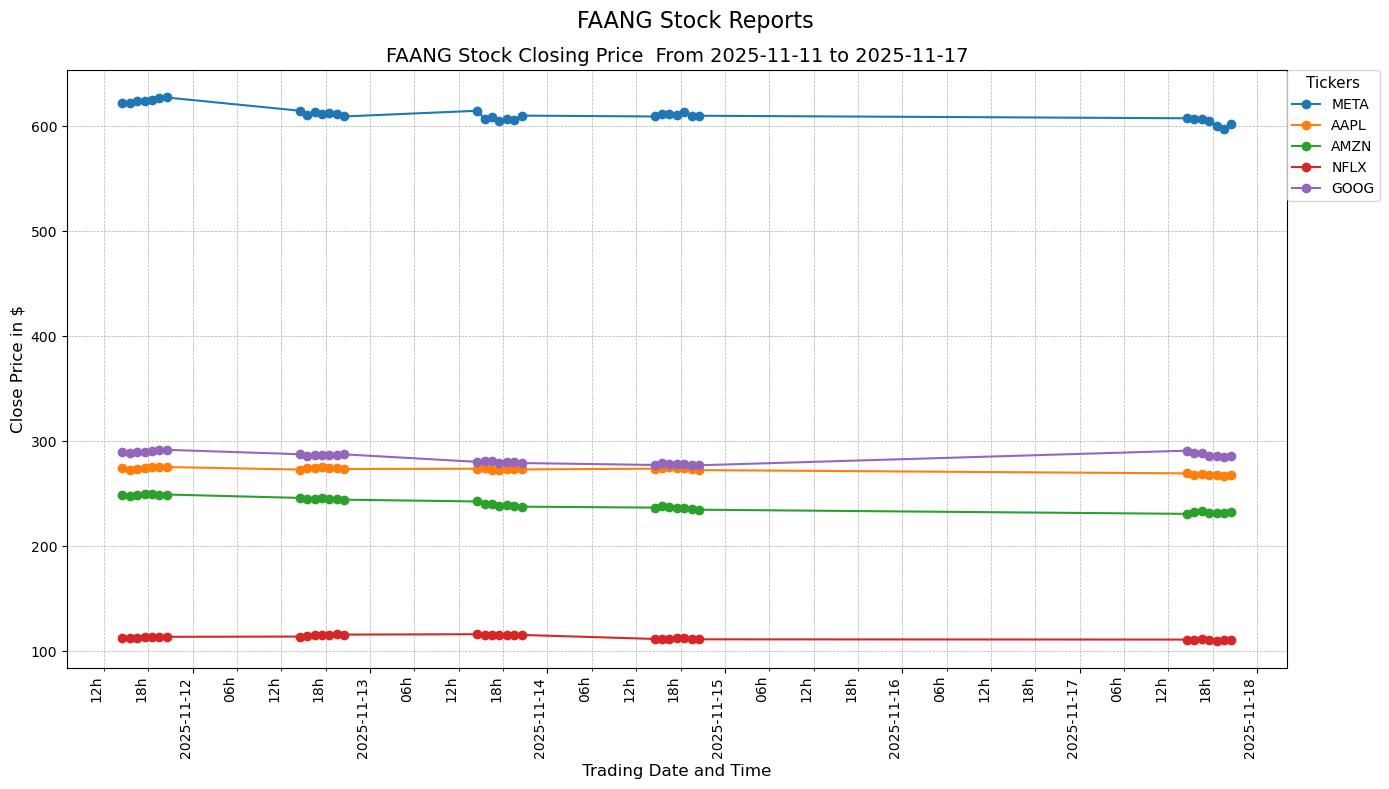

INFO:root:Plot saved to ./plots/20251118_195545.png


✓ Status: 0, Message: Plotting - Return Code: 0, Message: Success, File: ./plots/20251118_195545.png, File: Success


In [22]:
print("Smoke Test : Plotting")
return_code,return_message,filename = plot_data(show_plot=True)
print_status(return_code, f"Plotting - Return Code: {return_code}, Message: {return_message}, File: {filename}", return_message)


# Problem 3: Script #
Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

## Assignment: Problem 3 Requirements Specification##


**1. Script File Setup**

* [✅] Create a new file named faang.py.

* [✅] Ensure the file is saved in the root directory of the repository.

**2. Script Content & Structure**

* [✅] Add a "shebang" line at the very top (e.g., #!/usr/bin/env python3).

* [✅] Include all necessary import statements at the top (for yfinance, pandas, matplotlib, os, sys, etc.).

* [✅] Copy the get_data() function (from Problem 1) into the script.

* [✅] Copy the plot_data() function (from Problem 2) into the script.

* [✅] Include any helper functions needed by get_data or plot_data (like get_latest_file).

* [✅] Create a main() function to control the script's execution.

* [✅] Add the if __name__ == "__main__": block at the bottom to call the main() function.

**3. Script Execution Logic**

* [✅] Inside main(), ensure that get_data() is called first.

* [✅] Inside main(), ensure that plot_data() is called after get_data() successfully completes.

* [✅] Add error handling to stop the script if get_data() fails.

**4. Permissions & Running**

* [ ] The script must be made "executable" (using the chmod +x faang.py command in the terminal).

* [ ] The script must run successfully from the terminal when the user types ./faang.py.

**5. Documentation (Meta-Task)**

* [ ] Provide a separate explanation (e.g., in the notebook) detailing the steps taken to create the script, what the shebang line does, and how to make the script executable.

# Smoke Test

Import the "faang.py" module , and run the get_data() and plot_data() functions

INFO:root:File already exists for start date 2025-11-11, skipping download.
INFO:root:Starting data plotting...
INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251118_195545.csv


INFO:root:Successfully loaded data from ./data\20251118_195545.csv. Shape: (35, 25)
INFO:root:Data covers from 2025-11-11 to 2025-11-17


✓ Status: 0, Message: Data Retrieval - Return Code: 0, Message: Success, File: ./data\20251118_195545.csv, File: Success


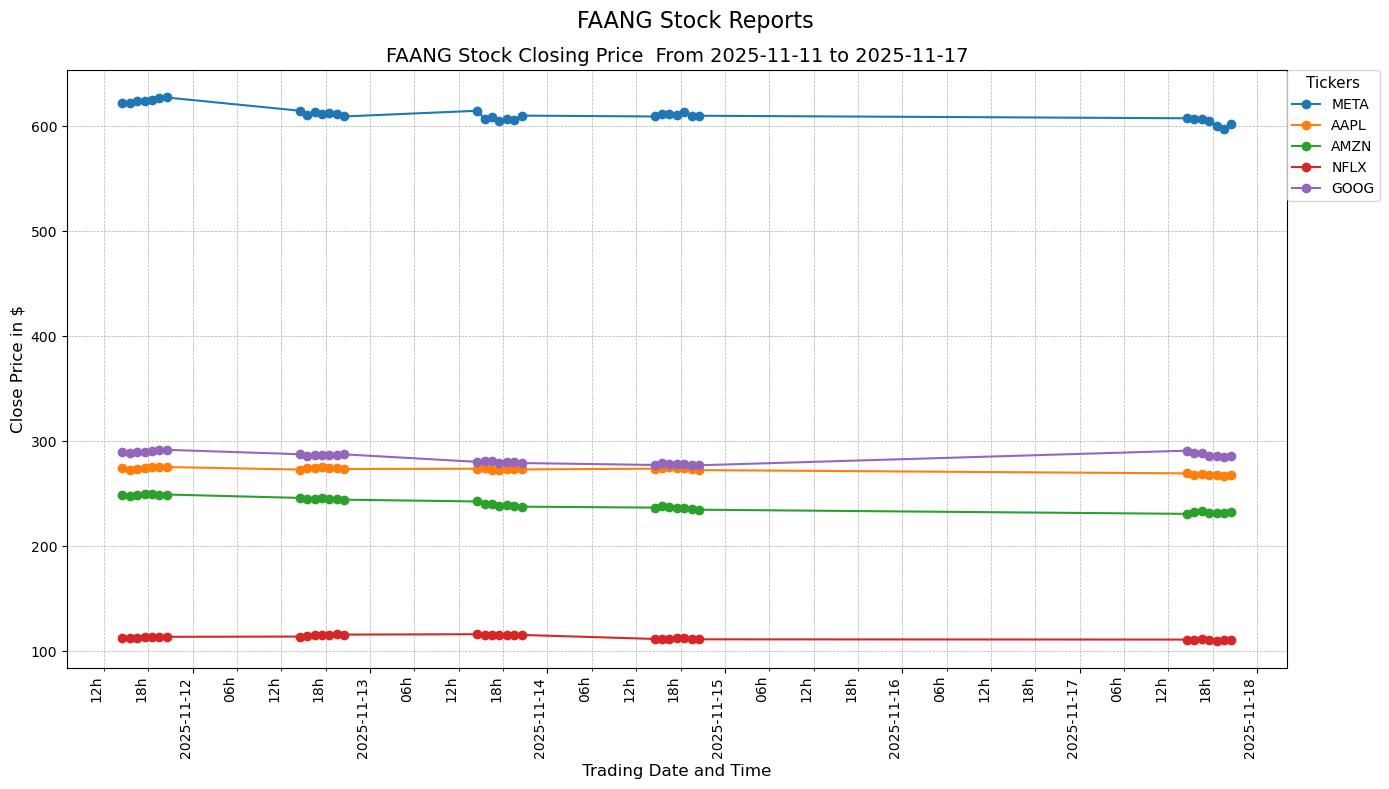

INFO:root:Plot saved to ./plots/20251118_195545.png


✓ Status: 0, Message: Plotting - Return Code: 0, Message: Success, File: ./plots/20251118_195545.png, File: Success


In [23]:
import faang as faang
# Smoke Test
# Import the "faang.py" module , and run the get_data() and plot_data() functions
return_code, return_message, file_name = faang.get_data()
print_status(return_code, f"Data Retrieval - Return Code: {return_code}, Message: {return_message}, File: {file_name}", return_message)
return_code, return_message, png_file_name = faang.plot_data(show_plot=True)
print_status(return_code, f"Plotting - Return Code: {return_code}, Message: {return_message}, File: {png_file_name}", return_message)

__The End__